In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('F:/Mayur/ANALYTICS/Data scientist/Data science with Python/Python for data science and machine learning/Refactored_Py_DS_ML_Bootcamp-master/13-Logistic-Regression/titanic_train.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


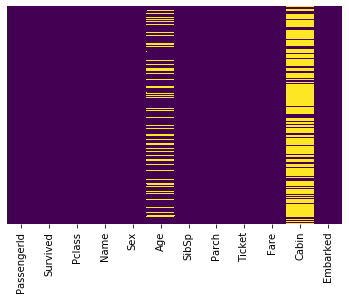

In [5]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

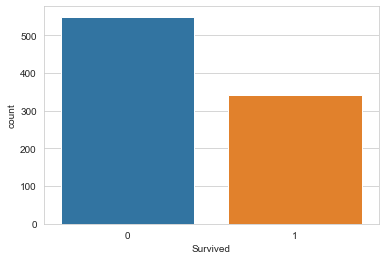

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

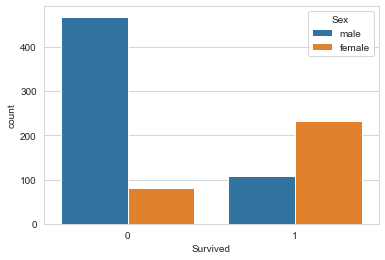

In [7]:
sns.countplot(x='Survived',hue='Sex',data=train)

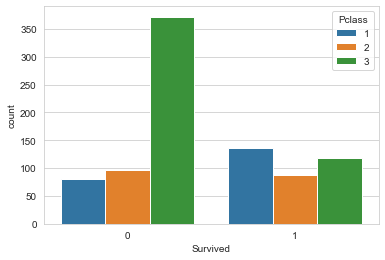

In [8]:
sns.countplot(x='Survived',hue='Pclass',data=train)


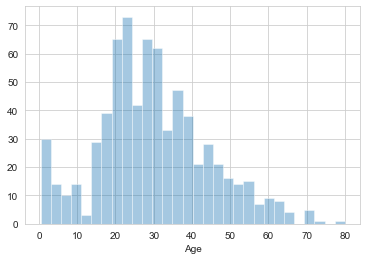

In [9]:
sns.distplot(train['Age'].dropna(),kde=False,bins=30)

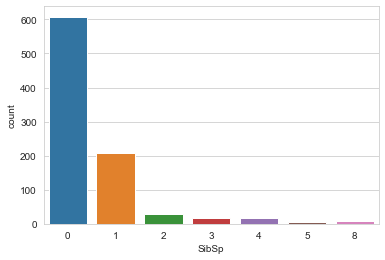

In [10]:
sns.countplot(train['SibSp'])

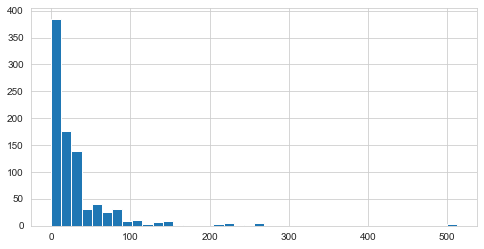

In [11]:
train['Fare'].hist(bins=40,figsize=(8,4))

In [12]:
import cufflinks as cf
cf.go_offline()

In [13]:
train['Fare'].iplot(kind='hist',bins=40)

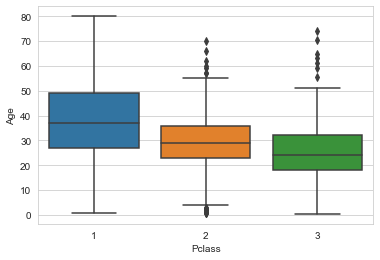

In [14]:
#Imputing missing values
sns.boxplot(train['Pclass'],train['Age'])

In [15]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass ==2:
            return 29
        else:
            return 24
    else:
        return Age
        

In [16]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

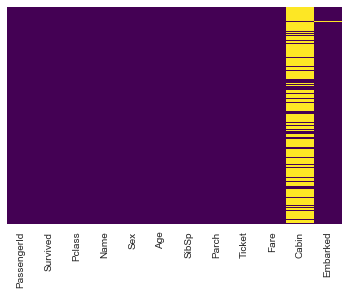

In [17]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [18]:
train.drop('Cabin',inplace=True,axis=1)

In [19]:
train.dropna(inplace=True)

In [20]:
train.columns
train.drop(['Name','Ticket','PassengerId'],axis=1,inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Sex         889 non-null object
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Fare        889 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [21]:
#Coverting data type of Pclass
train['Pclass'] = train.Pclass.astype(object)

In [22]:
train = pd.get_dummies(train,drop_first=True)

In [23]:
train.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,1,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,1,0,1


In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
Survived      889 non-null int64
Age           889 non-null float64
SibSp         889 non-null int64
Parch         889 non-null int64
Fare          889 non-null float64
Pclass_2      889 non-null uint8
Pclass_3      889 non-null uint8
Sex_male      889 non-null uint8
Embarked_Q    889 non-null uint8
Embarked_S    889 non-null uint8
dtypes: float64(2), int64(3), uint8(5)
memory usage: 46.0 KB


In [30]:
test = pd.read_csv('F:/Mayur/ANALYTICS/Data scientist/Data science with Python/Python for data science and machine learning/Refactored_Py_DS_ML_Bootcamp-master/13-Logistic-Regression/titanic_test.csv')

In [31]:
# cleaning and manipulating test data to treat as a validation data set
test['Age'] = test[['Age','Pclass']].apply(impute_age,axis=1)
test.drop(['Cabin','Name','Ticket','PassengerId'],axis=1,inplace=True)
test['Pclass'] = test.Pclass.astype(object)
test = pd.get_dummies(test,drop_first=True)

In [32]:
test.head()

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,34.5,0,0,7.8292,0,1,1,1,0
1,47.0,1,0,7.0000,0,1,0,0,1
2,62.0,0,0,9.6875,1,0,1,1,0
3,27.0,0,0,8.6625,0,1,1,0,1
4,22.0,1,1,12.2875,0,1,0,0,1


In [33]:
#splitting the training data for model building
X = train.drop('Survived',axis=1)
y = train['Survived']

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=111)

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
logmodel = LogisticRegression()

In [42]:
logmodel.fit(X_train,y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
predictions = logmodel.predict(X_test)

In [44]:
from sklearn.metrics import classification_report

In [45]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       163
           1       0.84      0.73      0.78       104

    accuracy                           0.84       267
   macro avg       0.84      0.82      0.83       267
weighted avg       0.84      0.84      0.84       267



In [46]:
from sklearn.metrics import confusion_matrix

In [47]:
print(confusion_matrix(y_test,predictions))

[[148  15]
 [ 28  76]]


In [96]:
logmodel.intercept_

array([2.98550249])

In [98]:
logmodel.coef_

array([[-0.03359301, -0.22729427, -0.14787983,  0.00423324, -0.61285392,
        -1.79802794, -2.28755046,  0.2532754 , -0.03392737]])

In [99]:
X.columns

Index(['Age', 'SibSp', 'Parch', 'Fare', 'Pclass_2', 'Pclass_3', 'Sex_male',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')